<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Shengtao Lin<br>
<b>NetID</b>:sl1377<br>
<b>Notes to Grader</b> (optional): <br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:  SL    


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

# Lab 6: Univariate Linear Regression

### Due Date: Sunday November 17, 2019 on or before 11:59 PM

In this lab we will work through the process of:
1. implementing a univariate linear regression model
2. defining, implementing and testing multiple loss functions 
3. minimizing loss functions using gradient descent
4. comparing with python library functions
5. Using the model to predict on new data


## Initialize

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Univariate Linear Regression
In the first task of the lab, we will model linear regression based on a data set that contains grades from CS 205 course in fall 2018. The dataset (with no ID's) contain midterm and final exam grades of Rutgers students (including other assignment grades). 

# Task 1 - Initialization
Read the file into a dataframe and keep only the midtermRaw and FinaRaw columns. We will be doing univariate regression on x=midterm, y=finalExam
The goal is to find a model that will allow us to predict the final exam score given the midterm score.

### Activity 1.1  Read Data

In [2]:
import pandas as pd
df = pd.read_csv("data/CS205_grades_12_19_18_Final.csv")
df_cleaned = df[['midtermRaw','finalRaw']]
# drop all undefined rows 
df_cleaned = df_cleaned.dropna() 
df_cleaned.head()

,midtermRaw,finalRaw
3,45.5,62.0
4,58.0,60.5
5,68.0,32.0
6,64.5,50.5
7,74.0,51.0


### Activity 1.2 Normalize Data
In this task, you need to normalize data using MinMaxScaler from sklearn.preprocessing. Normalize midterm and final scores to be between 0 and 1. X_scaled_values and Y_scaled_values are the normalized midterm and final exam scores.

In [3]:
# BEGIN SOLUTION
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df_cleaned)
scaled_df = pd.DataFrame(scaled_df, columns=['midtermScaled', 'finalScaled'])

X_scaled_values=np.asarray(scaled_df['midtermScaled']).reshape(-1, 1)
Y_scaled_values=np.asarray(scaled_df['finalScaled']).reshape(-1, 1)
# END SOLUTION


# call the scaled vectors x and y
x = X_scaled_values
y = Y_scaled_values

### Activity 1.3 Plot the data to see if a linear regression line is a good fit
It is helpful to understand if the data lends to a linear regression model. In this activity, we will plot the points to see if a line fit to data is reasonable.

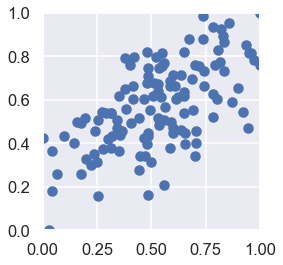

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### BEGIN SOLUTION
ax=plt.scatter(x,y)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal')
#ax.set_xlabel('midtermScaled')
#ax.set_ylabel('finalScaled')
### END SOLUTION

## Question 1.4
### BEGIN ANSWER
question: Based on what you see in the plot, do you think it is fine to use linear regression? Why?

I believe there is a linear regression relation between midterm and final grade since we ca see there is a correlation between them and when midterm grade increases, final grade increases
### END ANSWER

# Task 2 Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
to all data points (x,y), such that the L2 error (or any other error such as L1 or Huber)
$$
E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that we obtain the smallest possible error. 


In [5]:
# define the function h(theta)
def h(theta0, theta1, x):
    """
    Return the model theta0 + theta1*x
    
    """
    return theta0 + theta1*x

### Activity 2.1 - Define the square loss (L2) function
Define the function, sqerror that computes the error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average square loss or L2 loss in this case. 

In [6]:
import numpy as np

## BEGIN SOLUTION
def sqerror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model
    Input: x, y vectors
    Returns: L2 square error
    Assumptions: none
    """
    ht=0
    ht=h(theta0, theta1, x)
    a= [(ht1-y1)**2 for ht1,y1 in zip(ht,y)]
    L2=sum(a)/len(a)
    
    return list(L2)[0]
    
## END SOLUTION

## testing
sqerror(x, y, 0.29,0.52)

0.02348942348323907

### Activity 2.2 - Define the L1 Absolute error function
Define the function, abserror that computes the avarega absolute error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [7]:
import numpy as np
import math

## BEGIN SOLUTION
def abserror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: L1 error
    Assumptions: none
    """
    ht=0
    ht=h(theta0, theta1, x)
    a= [abs(ht1-y1) for ht1,y1 in zip(ht,y)]
    L1=sum(a)/len(a)
    
    return list(L1)[0]

## END SOLUTION

## testing
abserror(x, y, 0.29,0.52)

0.12588780834503435

### Activity 2.3 - Define the Pseudo Huber loss function
Define the function, huberror that computes the pseudo huber error based on the two arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. The equation for this function is given by 
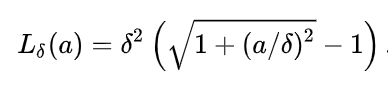
The following function finds the average huber error. In this equation, a  = |h(theta) - y| (see notes for details)

In [8]:
import numpy as np
import math

## BEGIN SOLUTION
def huberror(x, y, theta0, theta1, delta):
    """
    Input: parameters theta0, theta1 and delta of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """
    ht=0
    ht=h(theta0, theta1, x)  
    a= [abs(ht1-y1) for ht1,y1 in zip(ht,y)]
    Ldvalue=[delta**2*(math.sqrt(1+(a1/delta)**2)-1) for a1 in a]
    Ld=sum(Ldvalue)/len(Ldvalue)
    
    return Ld
    

## END SOLUTION

## testing
huberror(x, y, 0.29,0.52,0.1)

0.006994227909507368

### Activity 2.4 Interactive Exploration.
Let us initialize the interat widget (as in Lab5) to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values theta0 and theta1 and plot both the observed points (x,y) and the regression line on the same plot. It also needs to compute the error and display and error.

In [9]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [10]:
# interactive panel
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    y1 = h(theta0, theta1, x) 
    # compose plot
    pylab.plot(x,y1) 
    
    # compute the L2 error for theta0 and theta1 for 5 decimal places
    sqerr = round(sqerror(x, y, theta0, theta1),6)
    # compute the absolute or L1 error for theta0 and theta1
    abserr = round(abserror(x, y, theta0, theta1),4)
    # compute the phub error for theta0 and theta1
    huberr = round(huberror(x, y, theta0, theta1, 0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    pylab.scatter(x, y, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### Activity 2.5 Record the best values for each error function
Write the "best" values you found for theta0 (y-intercept) and theta1 (slope) and the error. 
This error is the minimum you have observed based on the manual exploration using the widget 
above.

In [11]:


# BEST VALUES FOR AVE SQUARE ERROR
theta0 = 0.3
theta1 =0.5
error = 0.126
# BEST VALUES FOR AVE ABS ERROR
theta0 =0.3
theta1 =0.5
error = 0.02353

# BEST VALUES FOR AVE HUBER ERROR
theta0 =0.2
theta1 =0.7
error = 0.0012

# Task 3 - Gradient Descent
In this task we use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the error function. The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x_j + \theta_0)-y_j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x_j + \theta_0 - y_j)*x_j
$$

The alpha is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works.

### Activity 3.1 Compute using Gradient Descent algorithm (L2 loss)

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compare with the sample output depends on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [24]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN SOLUTION  
def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    
    theta0=0
    theta1=1
    newError=sqerror(obsX,obsY,theta0,theta1)
    oldError=0
    iterations=0
    while(abs(newError-oldError)>=threshold):
        ht=h(theta0, theta1, obsX)
        diff=[(ht1-y1) for ht1,y1 in zip(ht,obsY)]
        
        theta0-=alpha*sum(diff)
        theta1-=alpha*(sum([(diff1*x1) for diff1,x1 in zip(diff,obsX)]))
        
        oldError=newError
        newError=sqerror(obsX,obsY,theta0,theta1)
        iterations+=1
        
        print("theta0:{} theta1:{} L2:{}".format(theta0[0],theta1[0],newError))
        
    return [theta0[0],theta1[0],newError,iterations]
    
    
    
    
    
# END SOLUTION

[theta0,theta1,newError,iterations] = gd2(x,y,0.01,0.000001)
print(iterations)

theta0:0.05437313432835818 theta1:0.9967095948827293 L2:0.0357338216876744
theta0:0.044009367164179046 theta1:0.9593776206883948 L2:0.034276709798248844
theta0:0.07069614881245201 theta1:0.9441697657455459 L2:0.03310265351529898
theta0:0.07445850260114387 theta1:0.917853040028166 L2:0.032094783720785586
theta0:0.09072534967175905 theta1:0.8999270692939488 L2:0.03120557208836749
theta0:0.09865378179349293 theta1:0.8787952165048333 L2:0.03041230896784455
theta0:0.11058707857120836 theta1:0.8612063155101113 L2:0.02970154508098296
theta0:0.11929279485989783 theta1:0.8430938322678296 L2:0.029063615767306053
theta0:0.12908170670422459 theta1:0.8267745889439873 L2:0.02849067900847348
theta0:0.13745408438385084 theta1:0.8108047769006026 L2:0.02797598156066322
theta0:0.1459247851577802 theta1:0.7959626266385375 L2:0.027513557511734624
theta0:0.15363876380038088 theta1:0.7817196378809479 L2:0.027098081947230377
theta0:0.16113673439377352 theta1:0.7683216378319104 L2:0.026724782782411194
theta0:0

In [13]:
# observe theta0 and theta1
theta0, theta1

(0.28945506496756085, 0.536085797656833)

### Activity 3.2 Compute Gradient Descent (Huber)
First Compute a formula for Pseudo huber gradient descent using derivative methods discussed in class and recitation. Similar to L2 descent, use the new formulas (obtained from pseudo huber derivatives) to compute values of theta1, theta1, error. The pseudo huber loss function is provided in Activity 2.3. Use that to differentiate the huber function wrt to theta0 and theta1. 

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compared with the sample output depending on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [49]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold

## BEGIN SOLUTION

def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    
    theta0=0
    theta1=1

    newError=huberror(obsX,obsY,theta0,theta1,delta)
    oldError=0
    iterations=0
    while(abs(newError-oldError)>=threshold):
        ht=h(theta0, theta1, obsX)
        ddiff=[(ht1-y1)/delta for ht1,y1 in zip(ht,obsY)]
        

        
        theta0-=alpha*sum([(delta**2)*(0.5)*((1+ddiff1**2)**0.5)*2*ddiff1 for ddiff1 in ddiff])
        theta1-=alpha*sum([(delta**2)*(0.5)*((1+ddiff1**2)**0.5)*2*ddiff1*obsX1 for ddiff1,obsX1 in zip(ddiff,obsX)])
        
        oldError=newError
        newError=huberror(obsX,obsY,theta0,theta1,delta)
        iterations+=1
        
        print("theta0:{} theta1:{} L2:{}".format(theta0[0],theta1[0],newError))
        
    return [theta0[0],theta1[0],newError,iterations]

## END SOLUTION
# testing    
[theta0,theta1,newError,iterations] = gdh(x,y,0.01,0.000001,0.01)
print(iterations)

theta0:0.012710052148225607 theta1:0.9975912942623517 L2:0.0014988434939998947
theta0:0.020886146665287347 theta1:0.9929456180793372 L2:0.001484003188999996
theta0:0.026803172673791207 theta1:0.9872571143357715 L2:0.0014729844589304372
theta0:0.03156674965598739 theta1:0.9811135415884872 L2:0.0014637187151256832
theta0:0.03572184655656106 theta1:0.9748047894701859 L2:0.0014553781049346324
theta0:0.039539573176085904 theta1:0.968473479315646 L2:0.0014475907915224367
theta0:0.04315603195268761 theta1:0.9621892419435116 L2:0.0014401797208655103
theta0:0.046640326972147955 theta1:0.9559854445098579 L2:0.0014330604694362174
theta0:0.05002812022151175 theta1:0.9498774020302114 L2:0.0014261922473273532
theta0:0.05333828931395354 theta1:0.9438714430301646 L2:0.0014195488227106913
theta0:0.05658123430354084 theta1:0.9379694351901197 L2:0.0014131044876454987
theta0:0.05976302746967335 theta1:0.9321710400090977 L2:0.0014068342473914823
theta0:0.06288749297726742 theta1:0.9264748332664559 L2:0.001

### Activity 3.2
1. Write the values of theta0, theta1, alpha, error that provided the minimum value through gradient descent
2. Experiment the new values of theta0, theta1 to see if the interactive widget shows similar things.

##### BEGIN ANSWER
theta0:0.19376790211005118, theta1:0.6908211925964008, alpha:0.01, error:0.0012055180273703812

The final theta0 and theta1 would change but still close to 0.2 and 0.7 unless the initially set too close such as theta0=.5 and theta1=.5 will result in theta0=0.316 and theta1=0.499

##### END ANSWER

### Activity 3.3 Compare with Library Estimators
Now use the sklearn LinearRegression module to automate this process. What coefficients do you get? Are they close to what you received from gradient descent? Find the error from sklearn package. Is that error smaller or bigger than the squared error you received?

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
result = lm.fit(x,y)
print(result.intercept_)
print(result.coef_)

[0.29620134]
[[0.5238794]]


In [44]:
theta0 = result.intercept_
theta1 = result.coef_
sqerror(x,y,theta0,theta1)

0.023420461270159783

## Task 4- Predict the Final Exam Score
The regression line was obtained using grades from CS 205 course. We can consider them to be training data. Now we trained a model (with theta0 and theta1) so we can predict the grade for your own course based on your midterm grade.
We will do few things before we can accomplish this task.

### Activity 4.1 Read the midterm grades
The grade file for CS439 midterm is given in data/CS439_grades.csv. Read this data file to a new 

In [45]:
import pandas as pd
df_439 = pd.read_csv("data/CS439_grades_03_15_19.csv")
df_439.info()
mid = df_439[df_439['midterm']<80]
mid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
midterm    97 non-null float64
dtypes: float64(1)
memory usage: 856.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 96
Data columns (total 1 columns):
midterm    96 non-null float64
dtypes: float64(1)
memory usage: 1.5 KB


### Activity 4.2 Predict your Grade
Scale the values in the midterm grades of CS 439 and compute the estimated final exam grade. Note that this is probably not a very good estimator since we are trying to predict final exam just by using a midterm score. However, using more features such as labs and quiz scores can help improve the accuracy. We will do that in a future lab. The output is shown as values scaled back to percentages (100% max)

In [48]:
from sklearn import preprocessing

## BEGIN SOLUTION
#print(mid.head(100))
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(mid)
scaled_df = pd.DataFrame(scaled_df, columns=['midtermScaled'])


#scaled_values=np.asarray(scaled_df['midtermScaled'])
#print(scaled_values)
#predict=h(theta0,theta1,scaled_df)
#theta=gd2(x,y,0.01,0.000001)
lm = LinearRegression()
result = lm.fit(x,y)
theta0=result.intercept_
theta1=result.coef_

scaled_df['finalScaled']=h(theta0,theta1,scaled_df)
#print(scaled_df)
#predict_df=scaler.inverse_transform(predict)
predict_df=scaler.inverse_transform(scaled_df)
predict_df = pd.DataFrame(predict_df, columns=['midterm','final'])
print(predict_df)
#p=pd.DataFrame(predict_df)
#result=pd.concat([mid, p], axis=1, sort=False)
#print(result)




    
## END SOLUTION

    midterm      final
0     58.50  58.624958
1     51.00  54.695862
2     55.00  56.791380
3     39.50  48.671249
4     71.50  65.435390
5     56.50  57.577199
6     50.00  54.171983
7     52.50  55.481681
8     51.50  54.957802
9     43.00  50.504827
10    53.50  56.005561
11    51.50  54.957802
12    64.00  61.506294
13    60.00  59.410777
14    55.00  56.791380
15    51.50  54.957802
16    58.50  58.624958
17    51.00  54.695862
18    58.00  58.363018
19    73.50  66.483149
20    62.00  60.458536
21    58.50  58.624958
22    34.50  46.051852
23    55.50  57.053320
24    48.00  53.124224
25    67.00  63.077933
26    61.00  59.934656
27    70.00  64.649571
28    46.00  52.076465
29    63.00  60.982415
..      ...        ...
66    36.50  47.099611
67    48.00  53.124224
68    42.00  49.980948
69    54.00  56.267500
70    61.00  59.934656
71    37.50  47.623490
72    61.00  59.934656
73    61.00  59.934656
74    55.50  57.053320
75    50.00  54.171983
76    51.50  54.957802
77    73.00

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-10, 10-highest) : 10
* how can we improve his lab? :

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_lab6.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; lab6 <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

Lab Developed by A.D. Gunawardena @ 2019 for CS 439